In [6]:
import mne

import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.interpolate import interp1d
import numpy as npy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
#This loads the test file
#file_path = "MU_01_2025-09-29_18_29_50_Muse_Recording.csv"

#Whole raw DF File
df = pd.read_csv(file_path)
df.head()

#total length of file in s 
total_length_ms = df['ms_ELAPSED'].iloc[-1] 
total_length_seconds = total_length_ms / 1000

#find file length in time 

for col_name in df.columns:
    print(col_name)

print(df.shape)

PACKET_TYPE
PACKET_TIMESTAMP
CLOCK_TIME
ms_ELAPSED
TP9_CONNECTION_STRENGTH(HSI)
TP9_ARTIFACT_FREE(IS_GOOD)
AF7_CONNECTION_STRENGTH(HSI)
AF7_ARTIFACT_FREE(IS_GOOD)
AF8_CONNECTION_STRENGTH(HSI)
AF8_ARTIFACT_FREE(IS_GOOD)
TP10_CONNECTION_STRENGTH(HSI)
TP10_ARTIFACT_FREE(IS_GOOD)
TP9_RAW
AF7_RAW
AF8_RAW
TP10_RAW
AUX_LEFT
AUX_RIGHT
TP9_DELTA_RELATIVE
AF7_DELTA_RELATIVE
AF8_DELTA_RELATIVE
TP10_DELTA_RELATIVE
TP9_THETA_RELATIVE
AF7_THETA_RELATIVE
AF8_THETA_RELATIVE
TP10_THETA_RELATIVE
TP9_ALPHA_RELATIVE
AF7_ALPHA_RELATIVE
AF8_ALPHA_RELATIVE
TP10_ALPHA_RELATIVE
TP9_BETA_RELATIVE
AF7_BETA_RELATIVE
AF8_BETA_RELATIVE
TP10_BETA_RELATIVE
TP9_GAMMA_RELATIVE
AF7_GAMMA_RELATIVE
AF8_GAMMA_RELATIVE
TP10_GAMMA_RELATIVE
BATTERY_PERCENT
(1447, 39)


Creating RawArray with float64 data, n_channels=6, n_times=1447
    Range : 0 ... 1446 =      0.000 ...     2.892 secs
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: TP9, AF7, AF8, TP10, C3, C4
 chs: 6 EEG
 custom_ref_applied: False
 dig: 9 items (3 Cardinal, 6 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 6
 projs: []
 sfreq: 500.0 Hz
>
<RawArray | 6 x 1447 (2.9 s), ~81 KiB, data loaded>


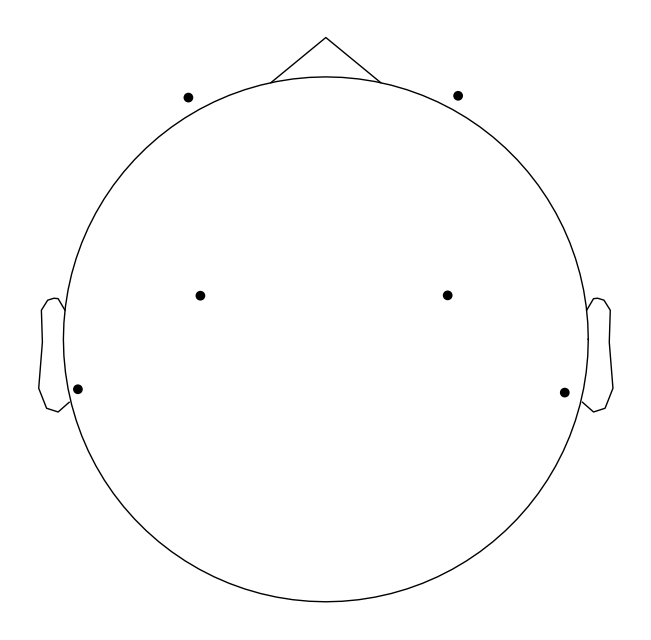

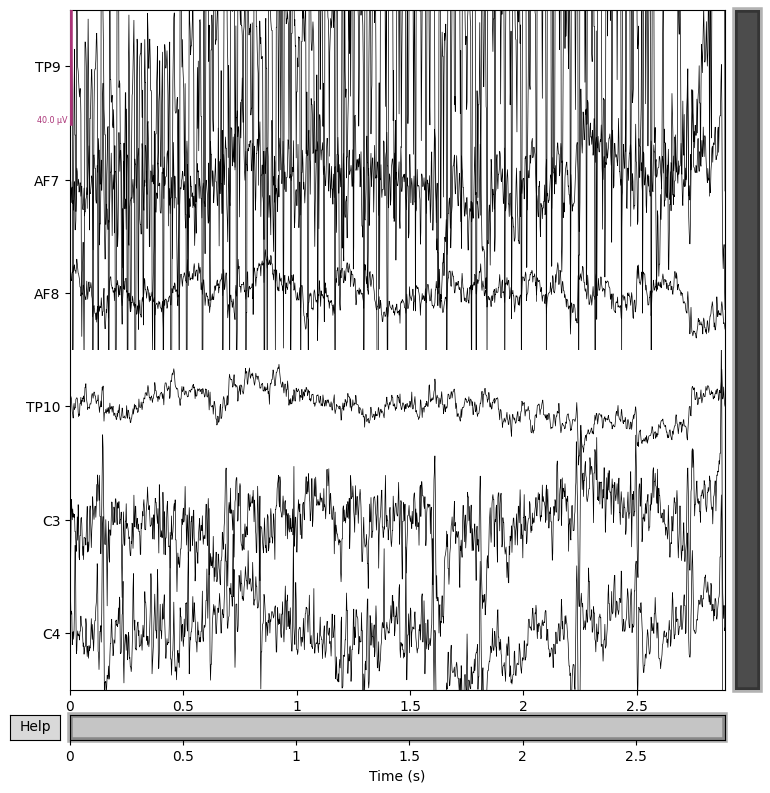

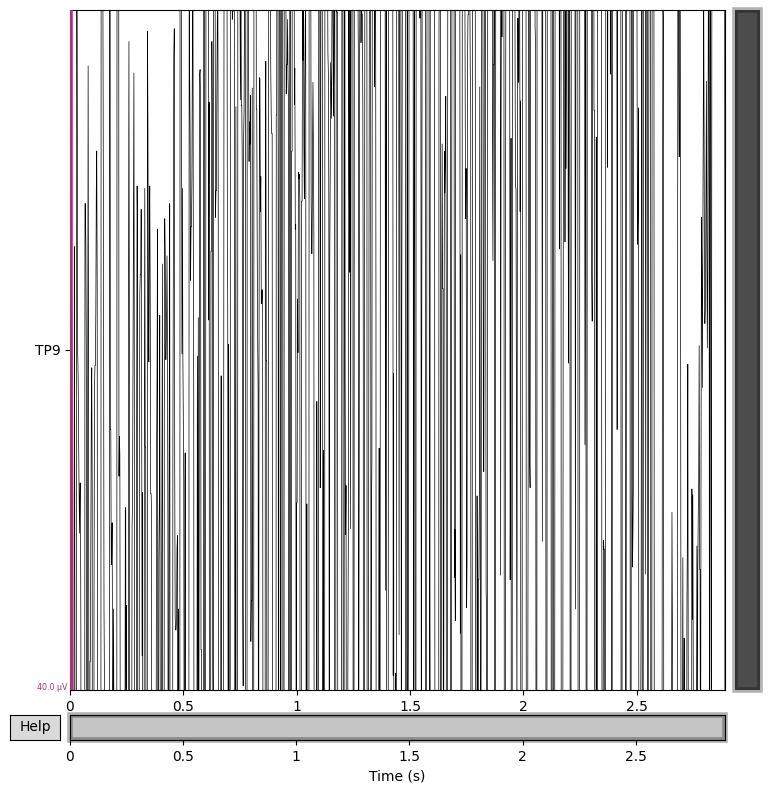

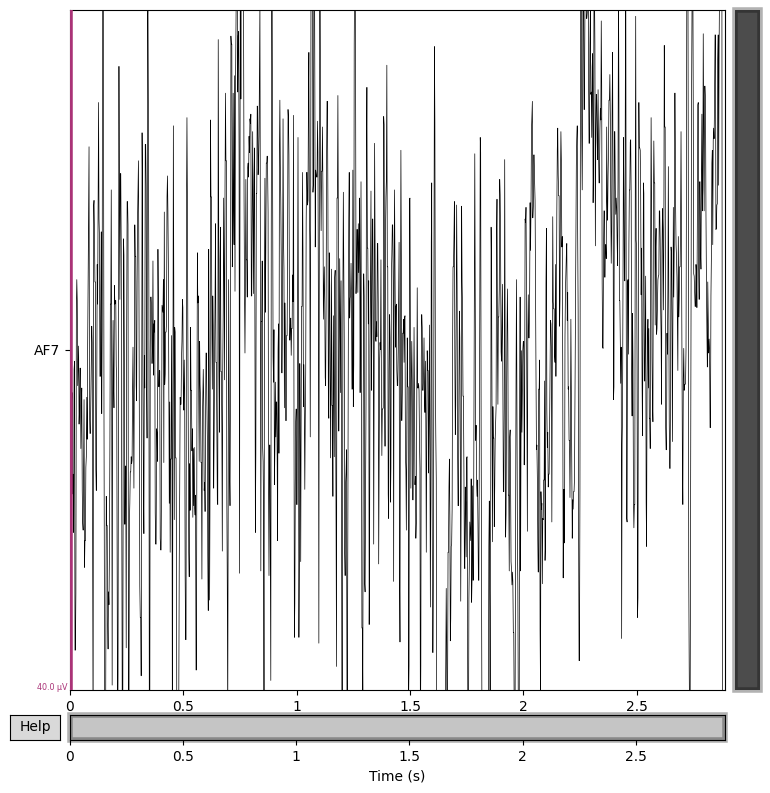

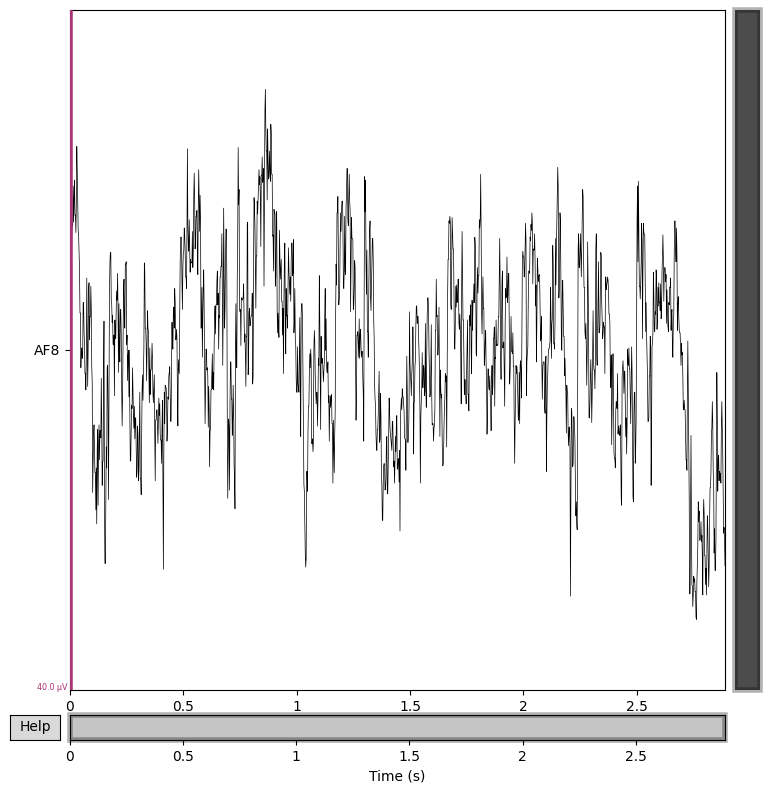

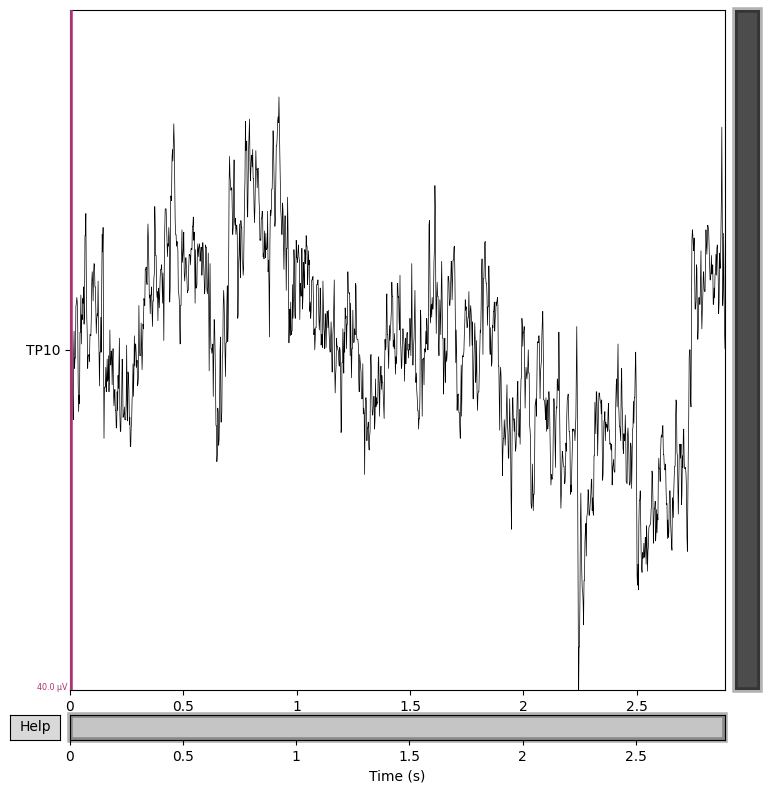

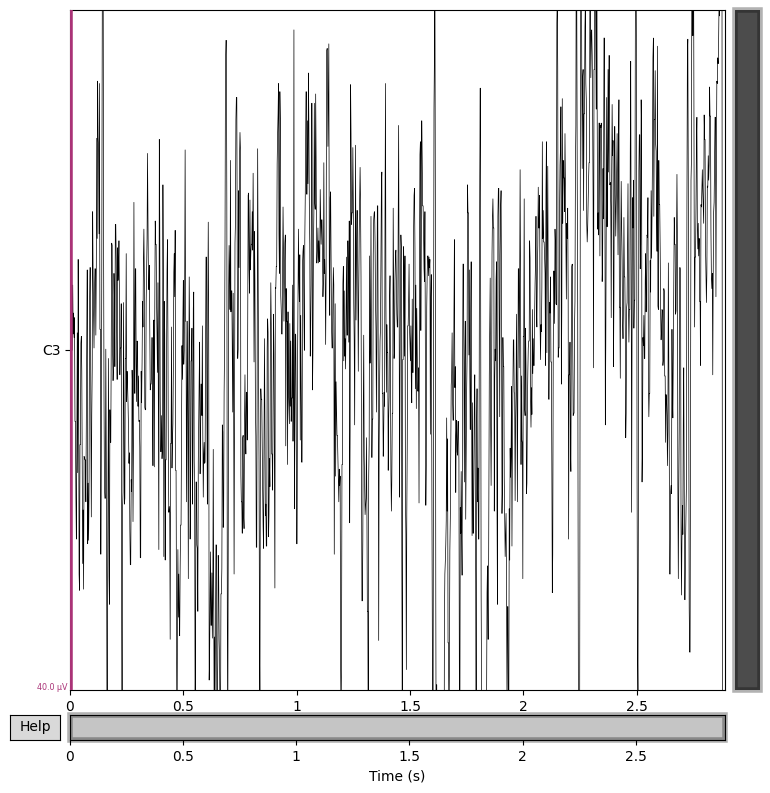

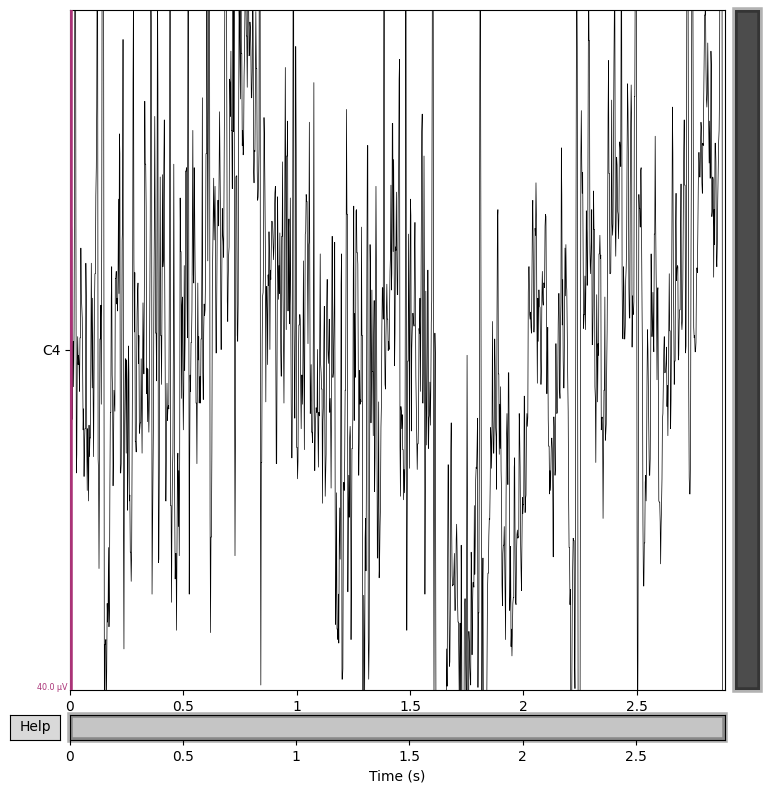

Effective window size : 2.894 (s)
Plotting power spectral density (dB=True).


/home/m/Desktop/Projects - Local/.venv/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


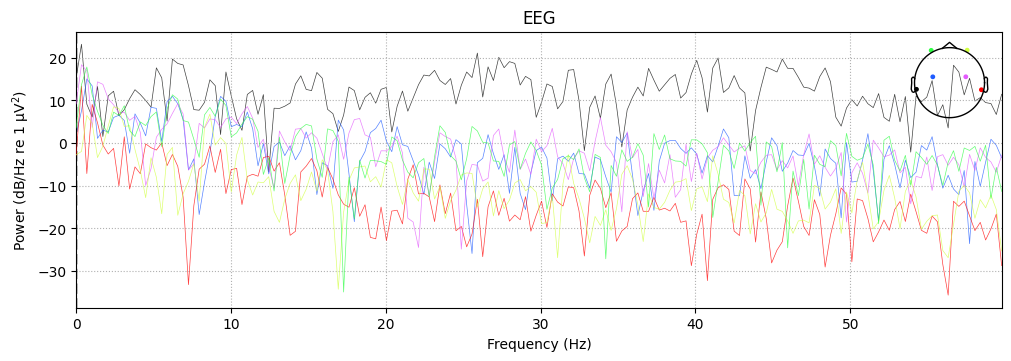

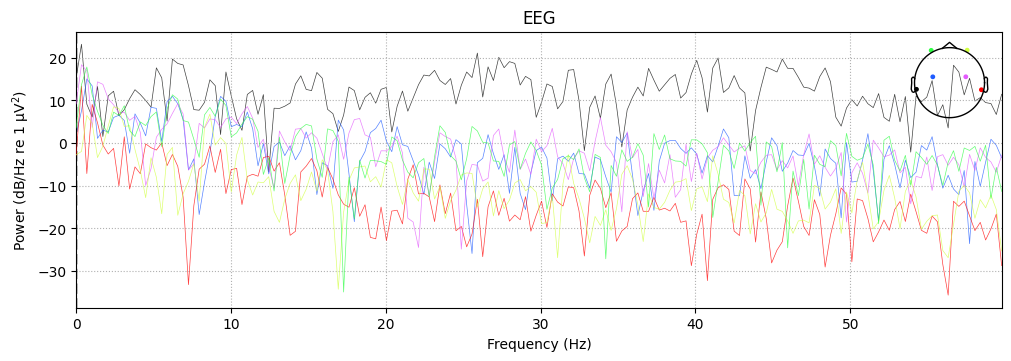

In [8]:
#raw EEG only
rawEEG = pd.read_csv(file_path, usecols=['TP9_RAW', 'AF7_RAW', 'AF8_RAW', 'TP10_RAW', "AUX_LEFT", "AUX_RIGHT"])

#printing the EEG file heads
#rawEEG.head()

#Set file Collumn Names
eeg_columns = ['TP9_RAW', 'AF7_RAW', 'AF8_RAW', 'TP10_RAW', "AUX_LEFT", "AUX_RIGHT"] 

eeg_data = rawEEG[eeg_columns].values.T  # Transpose to (n_channels, n_samples)

#Create Info object
ch_names = ['TP9', 'AF7', 'AF8', 'TP10', 'C3', 'C4'] # Set channel names
ch_types = ['eeg'] * len(ch_names) # Set channel types to EEG
sfreq = 500  # Sampling frequency in Hz (adjust to your data)

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

#Set montage for sensor positions
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)

#turning data into volts from uV 
data_volts = eeg_data * 1e-6

#creating MNE Raw object 
raw = mne.io.RawArray((data_volts), info)

#printing info 
print(raw.info)
print(raw)

#Plot EEG sensor locations 
raw.plot_sensors(ch_type="eeg")

raw.plot(start=0, duration=total_length_seconds);  # times are in seconds

#plot EEG by electrode
raw.plot(duration=total_length_seconds, n_channels=1, picks="TP9")
raw.plot(duration=total_length_seconds, n_channels=1, picks="AF7")
raw.plot(duration=total_length_seconds, n_channels=1, picks="AF8")
raw.plot(duration=total_length_seconds, n_channels=1, picks="TP10")
raw.plot(duration=total_length_seconds, n_channels=1, picks="C3") #AUX Left
raw.plot(duration=total_length_seconds, n_channels=1, picks="C4") #AUX right

#Plot PSD, max freq is our nyquist freq
raw.compute_psd(fmax=60).plot(picks="data", exclude="bads", amplitude=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 16501 samples (33.002 s)

<Info | 8 non-empty values
 bads: []
 ch_names: TP9, AF7, AF8, TP10, C3, C4
 chs: 6 EEG
 custom_ref_applied: False
 dig: 9 items (3 Cardinal, 6 EEG)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: unspecified
 nchan: 6
 projs: []
 sfreq: 500.0 Hz
>
<RawArray | 6 x 1447 (2.9 s), ~81 KiB, data loaded>


/tmp/ipykernel_77643/1940966528.py:7: RuntimeWarning: filter_length (16501) is longer than the signal (1447), distortion is likely. Reduce filter length or filter a longer signal.
  filtered_raw = raw.copy().filter(low_cut, hi_cut)


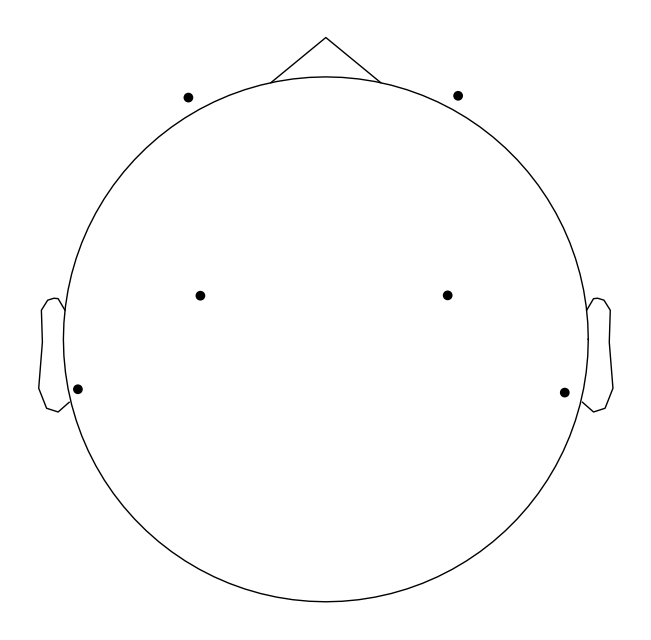

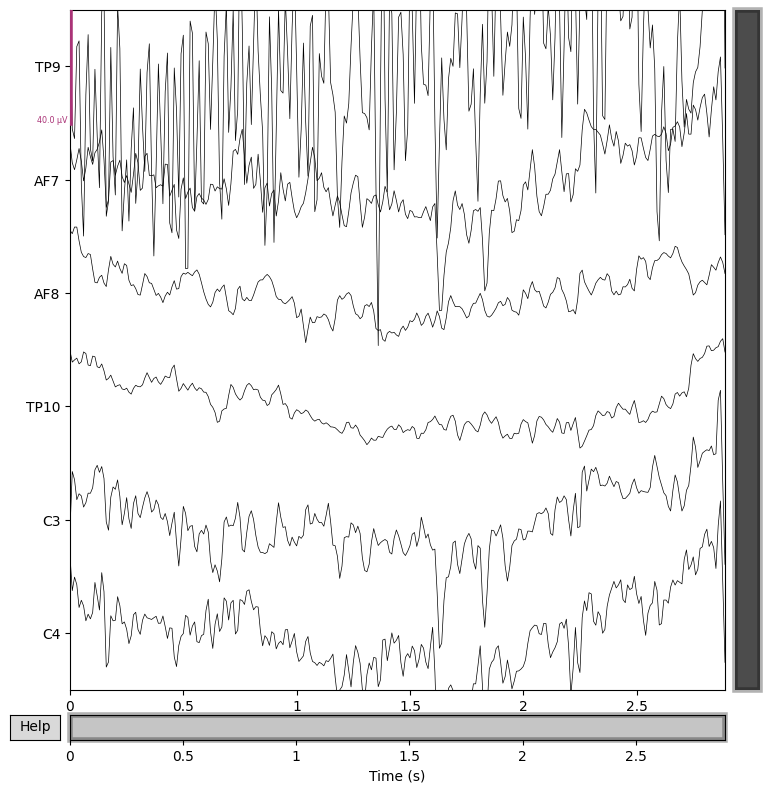

AssertionError: 

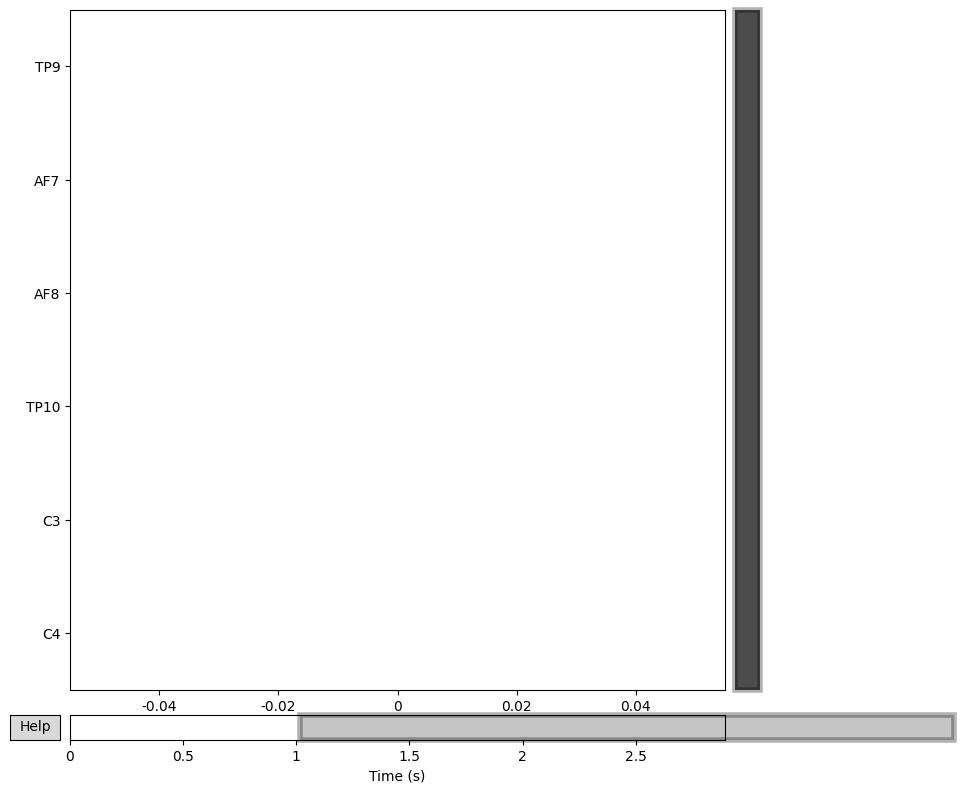

In [ ]:
#filtering raw 
# https://neuraldatascience.io/7-eeg/erp_filtering.html
# Filter settings
low_cut = 0.1
hi_cut  = 30
#apply filter - band pass from 0.1 - 30 Hz
filtered_raw = raw.copy().filter(low_cut, hi_cut)

#printing info 
print(filtered_raw.info)
print(raw)

#Plot EEG sensor locations 
filtered_raw.plot_sensors(ch_type="eeg")

#plot all filtered raw
filtered_raw.plot(start=0, duration=total_length_seconds);  # times are in seconds

#plot just the middle 
filtered_raw.plot(start=(total_length_seconds / 4), duration= (total_length_seconds / 4 * 3));  # times are in seconds

#plot EEG by electrode
filtered_raw.plot(duration=total_length_seconds, n_channels=1, picks="TP9")
filtered_raw.plot(duration=total_length_seconds, n_channels=1, picks="AF7")
filtered_raw.plot(duration=total_length_seconds, n_channels=1, picks="AF8")
filtered_raw.plot(duration=total_length_seconds, n_channels=1, picks="TP10")
filtered_raw.plot(duration=total_length_seconds, n_channels=1, picks="C3") #AUX Left
filtered_raw.plot(duration=total_length_seconds, n_channels=1, picks="C4") #AUX right

#Plot PSD, max freq is our nyquist freq
filtered_raw.compute_psd(fmax=60).plot(picks="data", exclude="bads", amplitude=False)